Coordinates in col, row
( 0 , 0 ) utility:  99.90068522040848 action:  up
( 0 , 1 ) utility:  98.29517945765397 action:  up
( 0 , 2 ) utility:  96.85143475909933 action:  up
( 0 , 3 ) utility:  95.4578641369429 action:  up
( 0 , 4 ) utility:  94.21750419704358 action:  up
( 0 , 5 ) utility:  92.84352668876943 action:  up
( 1 , 1 ) utility:  95.78595196220697 action:  left
( 1 , 2 ) utility:  95.49044080660859 action:  left
( 1 , 3 ) utility:  94.35747726945647 action:  left
( 1 , 5 ) utility:  91.63576947780736 action:  left
( 2 , 0 ) utility:  94.94959982740707 action:  left
( 2 , 1 ) utility:  94.44914096216962 action:  left
( 2 , 2 ) utility:  93.19951052802934 action:  left
( 2 , 3 ) utility:  93.13848999362497 action:  left
( 2 , 5 ) utility:  90.44307390309548 action:  left
( 3 , 0 ) utility:  93.78012700420777 action:  left
( 3 , 1 ) utility:  94.30303956313563 action:  left
( 3 , 2 ) utility:  93.08263620702817 action:  up
( 3 , 3 ) utility:  91.0226301768361 action:  up
( 3 , 

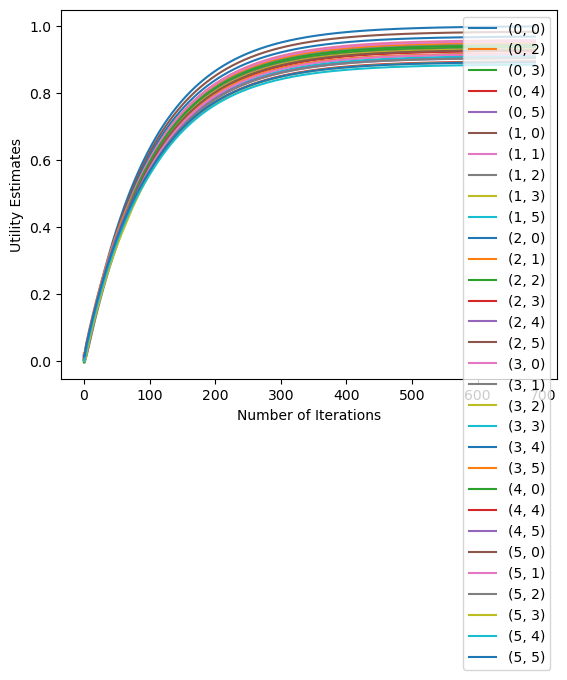

In [90]:
import pandas as pd
#Grid
grid = [[1, None, 1, -0.04, -0.04, 1], 
        [-0.04, -1, -0.04, 1, None, -1], 
        [ -0.04, -0.04, -1, -0.04, 1, -0.04], 
        [-0.04, -0.04, -0.04, -1, -0.04, 1], 
        [-0.04, None, None, None, -1, -0.04], 
        [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04]]

# Value Iteration
def valueIteration():
    # Create the Utility Grid
    U =  [[0 for i in range(len(grid[0]))] for j in range(len(grid))]
    # Create the Policy Grid
    action = [[0 for i in range(len(grid[0]))] for j in range(len(grid))]
    # Create the dictionary for all the Iterations
    dic = {}
    maxChange = 0
    while True:
        maxChange = 0
        # Iterate through the Grid
        for r in range(0, len(grid)):
            for c in range(0, len(grid[0])):
                # Get U[s'] for UP
                if(grid[r][c] == None):
                    continue
                if r > 0 and r < len(grid):
                    if grid[r-1][c] == None:
                        up = U[r][c]
                    else:
                        up = U[r-1][c]
                else: 
                    up = U[r][c]
                # down
                if r >= 0 and r < (len(grid)-1):
                    if grid[r+1][c] == None:
                        down = U[r][c]
                    else:
                        down = U[r+1][c]
                else: 
                    down = U[r][c]
                # right
                if c < len(grid[0])-1 and c >= 0 :
                    if grid[r][c+1] == None:
                        right = U[r][c]
                    else:
                        right = U[r][c+1]
                else:
                    right = U[r][c]
                # left
                if c > 0 and c < len(grid[0]):
                    if grid[r][c-1] == None:
                        left = U[r][c]
                    else:
                        left = U[r][c-1]
                else: 
                    left = U[r][c]
                # For each possible move calculate the Utility
                upValue = 0.8 * up + 0.1 * right + 0.1 * left
                downValue = 0.8 * down + 0.1 * right + 0.1 * left
                rightValue = 0.8*right + 0.1 * up + 0.1 * down
                leftValue = 0.8*left + 0.1 * up + 0.1 * down
                # Get the highest possible utility 
                maxValue = max(max(upValue, downValue), max(rightValue, leftValue))
                actionString = "left"
                if(maxValue == upValue):
                    actionString = "up"
                elif(maxValue == downValue):
                    actionString = "down"
                elif(maxValue == rightValue):
                    actionString = "right"
                else:
                    actionString = "left"
                # Save the Policy used to get this Utility Value
                action[r][c] = actionString
                oldValue = U[r][c]
                # Calculate the Expected Utility using the Bellman Equation
                val = grid[r][c] + 0.99 * maxValue
                if dic.get((r,c)) == None:
                    dic[(r,c)] = [val]
                else:
                    dic.get((r,c)).append(U[r][c])
                # Update the Utility Grid
                U[r][c] = val
                # If the Change in Utility is Greater than the maximum change in utility for this iteration
                # Then we update the maximum change in Utility to the current Change in Utility
                if(abs(U[r][c]-oldValue)) > maxChange:
                    maxChange = abs(U[r][c]-oldValue)
        # End of Iteration
        # Check for Convergence at the end of the iteration
        if maxChange < ((0.1*(1- .99))/0.99):
            break
    # Print the utility of all states
    print("Coordinates in col, row")
    for c in range(len(grid[0])):
        for r in range(len(grid)):
            if(U[r][c] == 0):
                continue
            print("(", c, ",", r, ")", "utility: ", U[r][c], "action: ", action[r][c])
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if(U[r][c] == 0):
                print("Wall", end = " | ")
            else:
                print(action[r][c], end = " | ")
        print()
        print("---------------" * 2)
    
    df = pd.DataFrame()
    for x in dic.keys():
        allVals = dic.get(x)
        normalized_vals = [x/100 for x in allVals ]
        df[str(x)] = normalized_vals

    ax = df.plot(y = df.columns, use_index = True)
    ax.set_xlabel("Number of Iterations")
    ax.set_ylabel("Utility Estimates")
        
#Call The Value Iteration Function
valueIteration()


Coordinates in col, row
( 0 , 0 ) utility:  98.18102861583114 action:  up
( 0 , 1 ) utility:  96.59513625552147 action:  up
( 0 , 2 ) utility:  95.17072624815928 action:  up
( 0 , 3 ) utility:  93.7960371425121 action:  up
( 0 , 4 ) utility:  92.57229547255707 action:  up
( 0 , 5 ) utility:  91.21680345556932 action:  up
( 1 , 1 ) utility:  94.10524345126696 action:  left
( 1 , 2 ) utility:  93.82840636903782 action:  left
( 1 , 3 ) utility:  92.71224572622457 action:  left
( 1 , 5 ) utility:  90.02531347693925 action:  left
( 2 , 0 ) utility:  93.28980837159679 action:  left
( 2 , 1 ) utility:  92.78934950636013 action:  left
( 2 , 2 ) utility:  91.55600091783155 action:  left
( 2 , 3 ) utility:  91.50990017845912 action:  left
( 2 , 5 ) utility:  88.84872246223605 action:  left
( 3 , 0 ) utility:  92.13736357237389 action:  left
( 3 , 1 ) utility:  92.66371700664827 action:  left
( 3 , 2 ) utility:  91.46129476968173 action:  up
( 3 , 3 ) utility:  89.4187850943471 action:  up
( 3 , 

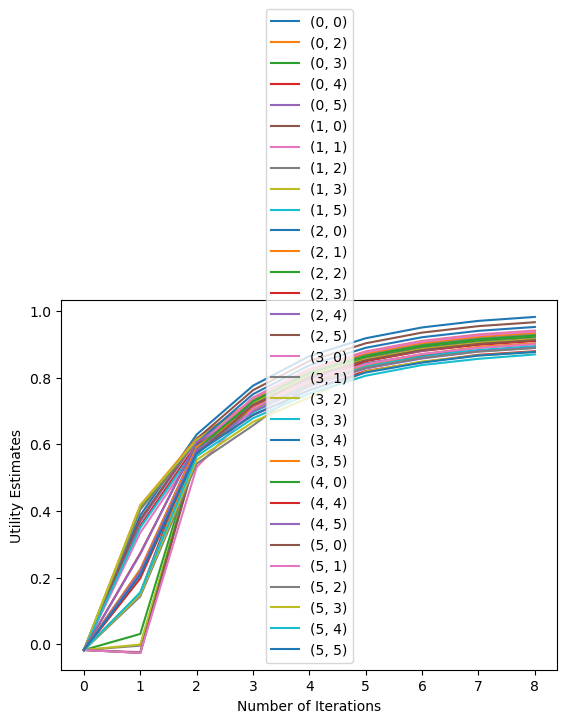

In [106]:
# Policy Iteration
import random
#Grid
grid = [[1, None, 1, -0.04, -0.04, 1, ], 
        [-0.04, -1, -0.04, 1, None, -1], 
        [ -0.04, -0.04, -1, -0.04, 1, -0.04], 
        [-0.04, -0.04, -0.04, -1, -0.04, 1], 
        [-0.04, None, None, None, -1, -0.04], 
        [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04]]


def policyIteration():
    # Generate utility grid
    U =  [[0 for i in range(len(grid[0]))] for j in range(len(grid))]
    # List of directions
    li = ["up", "down", "right", "left"]
    # Randomly Generate an action for each policy 
    pi =  [[random.choice(li) for i in range(len(grid[0]))] for j in range(len(grid))]
    # Create the Policy Grid
    action = [[0 for i in range(len(grid[0]))] for j in range(len(grid))]
    # Create the dictionary to store all the Utility iterations
    dic = {}
    maxChange = 0
    # Initiate the unchanged Variable as false
    unchanged = False
    while unchanged == False:
        unchanged = True
        # Iterate through the possible coordinates
        # Policy Evaluation
        for x in range(50):
            for r in range(len(grid)):
                for c in range(len(grid[0])):
                    # Get U[s'] for UP
                    if(grid[r][c] == None):
                        continue

                    if r > 0 and r < len(grid):
                        if grid[r-1][c] == None:
                            up = U[r][c]
                        else:
                            up = U[r-1][c]
                    else: 
                        up = U[r][c]
                    # down
                    if r >= 0 and r < len(grid)-1:
                        if grid[r+1][c] == None:
                            down = U[r][c]
                        else:
                            down = U[r+1][c]
                    else: 
                        down = U[r][c]
                    # right
                    if c < len(grid[0])-1 and c >= 0 :
                        if grid[r][c+1] == None:
                            right = U[r][c]
                        else:
                            right = U[r][c+1]
                    else:
                        right = U[r][c]
                    # left
                    if c > 0 and c < len(grid[0]):
                        if grid[r][c-1] == None:
                            left = U[r][c]
                        else:
                            left = U[r][c-1]
                    else: 
                        left = U[r][c]

                    # Calculate Utility for each possible move 
                    upValue = 0.8 * up + 0.1 * right + 0.1 * left
                    downValue = 0.8 * down + 0.1 * right + 0.1 * left
                    rightValue = 0.8*right + 0.1 * up + 0.1 * down
                    leftValue = 0.8*left + 0.1 * up + 0.1 * down
                    # Decide the Optimal Utility based on the Optimal Policy
                    val = 0
                    if(pi[r][c] == "up"):
                        val = upValue
                    elif(pi[r][c] == "down"):
                        val = downValue
                    elif(pi[r][c] == "left"):
                        val = leftValue
                    else:
                        val = rightValue
                    # Utility calculated based on Bellman Equation 
                    val = grid[r][c] + (0.99 * val)
                    # Update Utility based on the Optimal Policy
                    U[r][c] = val
                    
                    
        for r in range(0, len(grid)):
            for c in range(0, len(grid[0])):
                # Get U[s'] for UP
                
                if(grid[r][c] == None):
                    continue
                if r > 0 and r < len(grid):
                    if grid[r-1][c] == None:
                        up = U[r][c]
                    else:
                        up = U[r-1][c]
                else: 
                    up = U[r][c]
                # down
                if r >= 0 and r < len(grid)-1:
                    if grid[r+1][c] == None:
                        down = U[r][c]
                    else:
                        down = U[r+1][c]
                else: 
                    down = U[r][c]
                # right
                if c < len(grid[0])-1 and c >= 0 :
                    if grid[r][c+1] == None:
                        right = U[r][c]
                    else:
                        right = U[r][c+1]
                else:
                    right = U[r][c]
                # left
                if c > 0 and c < len(grid):
                    if grid[r][c-1] == None:
                        left = U[r][c]
                    else:
                        left = U[r][c-1]
                else: 
                    left = U[r][c]
                upValue = 0.8 * up + 0.1 * right + 0.1 * left
                downValue = 0.8 * down + 0.1 * right + 0.1 * left
                rightValue = 0.8*right + 0.1 * up + 0.1 * down
                leftValue = 0.8*left + 0.1 * up + 0.1 * down
                realString = ""
                # Get the best expected utility
                maxValue = max(max(upValue, downValue), max(rightValue, leftValue))
                # Get the action of the best utility
                if(maxValue == upValue):
                    realString = "up"
                elif(maxValue == downValue):
                    realString = "down"
                elif(maxValue == rightValue):
                    realString = "right"
                else:
                    realString = "left"
                action[r][c] = realString
                # Get the Utility value of following the optimal policy
                oldAction = 0
                if(pi[r][c] == "up"):
                    oldAction = upValue
                elif(pi[r][c] == "down"):
                    oldAction = downValue
                elif(pi[r][c] == "left"):
                    oldAction = leftValue
                else:
                    oldAction = rightValue
                if dic.get((r,c)) == None:
                    dic[(r,c)] = [val]
                else:
                    dic.get((r,c)).append(U[r][c])
                if  maxValue > oldAction:
                    pi[r][c] = realString
                    unchanged = False
                
    # Print the utility of all states
    print("Coordinates in col, row")
    for c in range(len(grid[0])):
        for r in range(len(grid)):
            if(U[r][c] == 0):
                continue
            print("(", c, ",", r, ")", "utility: ", U[r][c], "action: ", action[r][c])
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if(U[r][c] == 0):
                print("Wall", end = " | ")
            else:
                print(action[r][c], end = " | ")
            # print(" | ")
        print()
        print("---------------" * 2)
    
    df = pd.DataFrame()
    for x in dic.keys():
        allVals = dic.get(x)
        normalized_vals = [x/100 for x in allVals ]
        df[str(x)] = normalized_vals
    ax = df.plot(y = df.columns, use_index = True)
    ax.set_xlabel("Number of Iterations")
    ax.set_ylabel("Utility Estimates")

policyIteration()


Coordinates in col, row
( 0 , 0 ) utility:  99.90068522040848 action:  up
( 0 , 1 ) utility:  98.29517945765397 action:  up
( 0 , 2 ) utility:  96.85143475909933 action:  up
( 0 , 3 ) utility:  95.4578641369429 action:  up
( 0 , 4 ) utility:  94.21750419704358 action:  up
( 0 , 5 ) utility:  92.84352668876943 action:  up
( 0 , 6 ) utility:  91.63576947780736 action:  up
( 0 , 8 ) utility:  99.90068522040848 action:  up
( 0 , 9 ) utility:  98.29517945765397 action:  up
( 0 , 10 ) utility:  96.85143475909933 action:  up
( 0 , 11 ) utility:  95.4578641369429 action:  up
( 0 , 12 ) utility:  94.21750419704358 action:  up
( 0 , 13 ) utility:  92.84352668876943 action:  up
( 0 , 14 ) utility:  91.63576947780736 action:  up
( 1 , 1 ) utility:  95.78595196220697 action:  left
( 1 , 2 ) utility:  95.49044080660859 action:  left
( 1 , 3 ) utility:  94.35747726945647 action:  left
( 1 , 5 ) utility:  91.63576947780736 action:  left
( 1 , 7 ) utility:  91.74609749911811 action:  right
( 1 , 9 ) ut

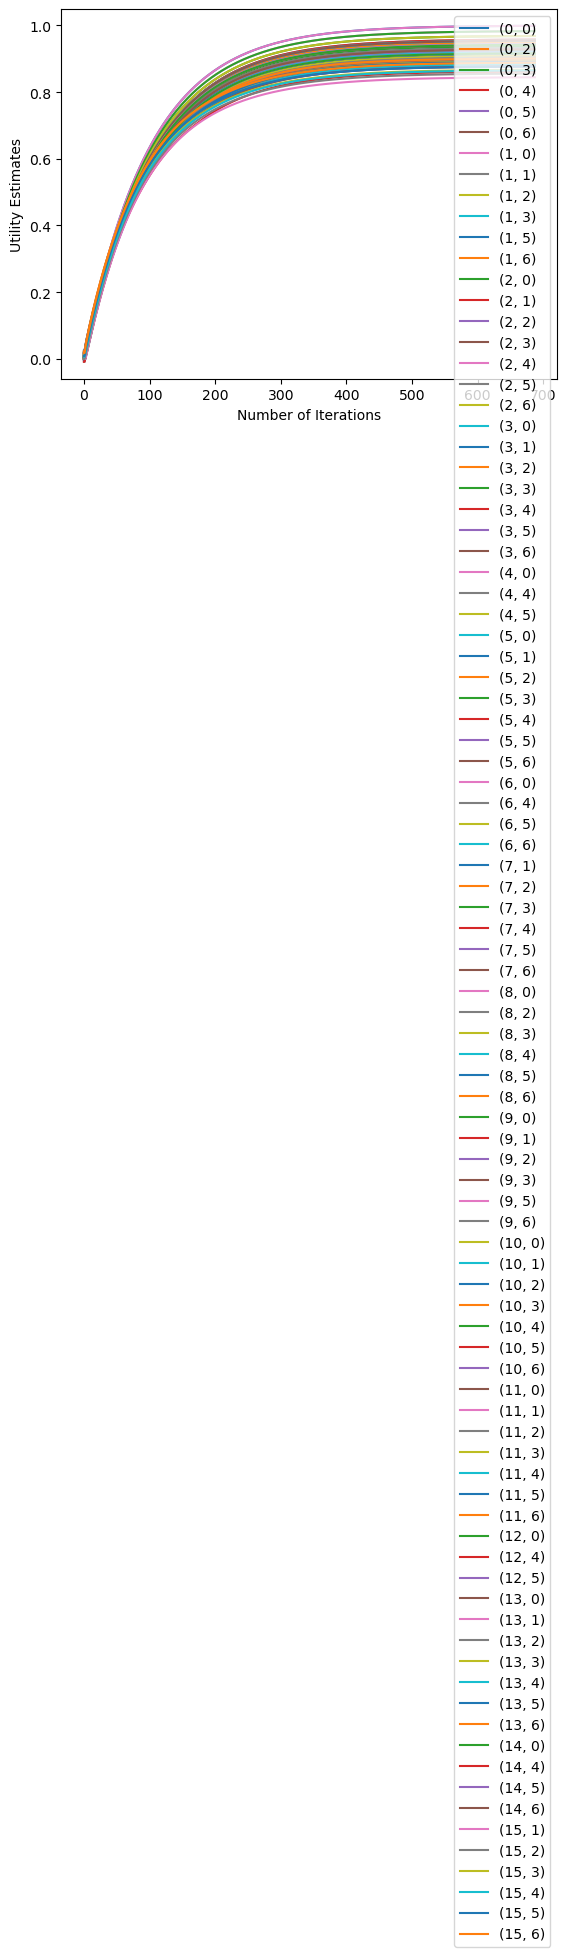

In [108]:
#Generate a maze with more states and greater complexity
grid = [[1, None, 1, -0.04, -0.04, 1, -1], 
        [-0.04, -1, -0.04, 1, None, -1, 1], 
        [ -0.04, -0.04, -1, -0.04, 1, -0.04, -1], 
        [-0.04, -0.04, -0.04, -1, -0.04, 1, -1], 
        [-0.04, None, None, None, -1, -0.04, None], 
        [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, 1],
          [-0.04, None, None, None, -1, -0.04, -1],
       [None, -0.04, -0.04, 1, -0.04, -0.04, 1],
       [1, None, 1, -0.04, -0.04, 1, -1], 
        [-0.04, -1, -0.04, 1, None, -1, 1], 
        [ -0.04, -0.04, -1, -0.04, 1, -0.04, -1], 
        [-0.04, -0.04, -0.04, -1, -0.04, 1, -1], 
        [-0.04, None, None, None, -1, -0.04, None], 
        [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, 1],
          [-0.04, None, None, None, -1, -0.04, -1],
       [None, -0.04, -0.04, 1, -0.04, -0.04, 1]]
        
#Call The Value Iteration Function
valueIteration()






Coordinates in col, row
( 0 , 0 ) utility:  95.77218941566667 action:  up
( 0 , 1 ) utility:  94.21377087340416 action:  up
( 0 , 2 ) utility:  92.81644427440591 action:  up
( 0 , 3 ) utility:  91.4682037847237 action:  up
( 0 , 4 ) utility:  90.26774044834657 action:  up
( 0 , 5 ) utility:  88.93814230803534 action:  up
( 0 , 6 ) utility:  87.7694389408806 action:  up
( 0 , 8 ) utility:  96.63930415835082 action:  up
( 0 , 9 ) utility:  95.0709958099672 action:  up
( 0 , 10 ) utility:  93.66391994141505 action:  up
( 0 , 11 ) utility:  92.30615868968893 action:  up
( 0 , 12 ) utility:  91.09731580426217 action:  up
( 0 , 13 ) utility:  89.75839659253614 action:  up
( 0 , 14 ) utility:  88.5814906825364 action:  up
( 1 , 1 ) utility:  91.7509614775136 action:  left
( 1 , 2 ) utility:  91.50028243162667 action:  left
( 1 , 3 ) utility:  90.40765873825555 action:  left
( 1 , 5 ) utility:  87.7694389408806 action:  left
( 1 , 7 ) utility:  88.61115322837439 action:  right
( 1 , 9 ) utilit

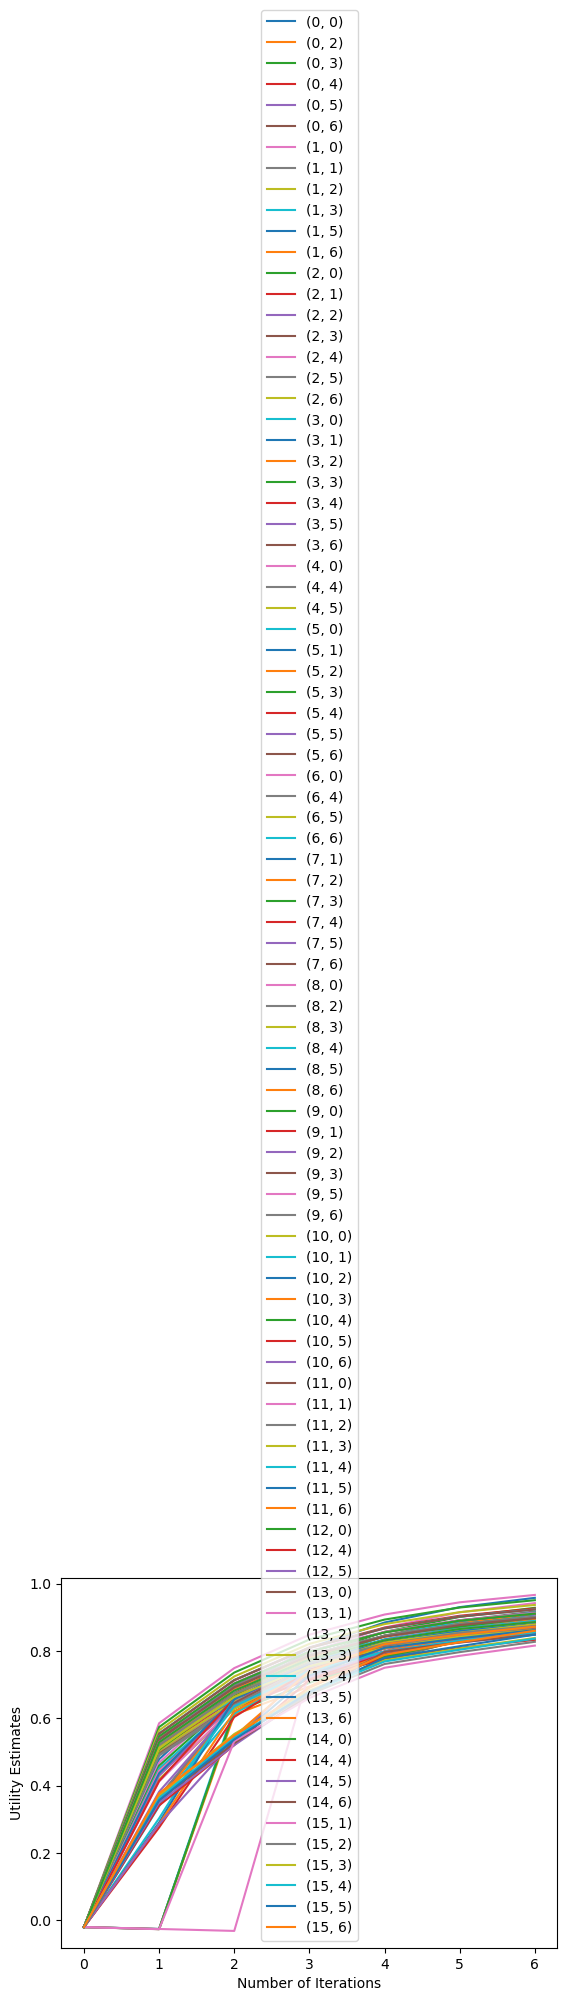

In [110]:

#Call The Policy Iteration Function
policyIteration()